### Step 1: Data Acquisition

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx')

# Display the first few rows of the dataframe
print(data.head())


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


### Step 2: Data Exploration and Preprocessing

            Quantity                    InvoiceDate          Price  \
count  525461.000000                         525461  525461.000000   
mean       10.337667  2010-06-28 11:37:36.845017856       4.688834   
min     -9600.000000            2009-12-01 07:45:00  -53594.360000   
25%         1.000000            2010-03-21 12:20:00       1.250000   
50%         3.000000            2010-07-06 09:51:00       2.100000   
75%        10.000000            2010-10-15 12:45:00       4.210000   
max     19152.000000            2010-12-09 20:01:00   25111.090000   
std       107.424110                            NaN     146.126914   

         Customer ID  
count  417534.000000  
mean    15360.645478  
min     12346.000000  
25%     13983.000000  
50%     15311.000000  
75%     16799.000000  
max     18287.000000  
std      1680.811316  
Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country 

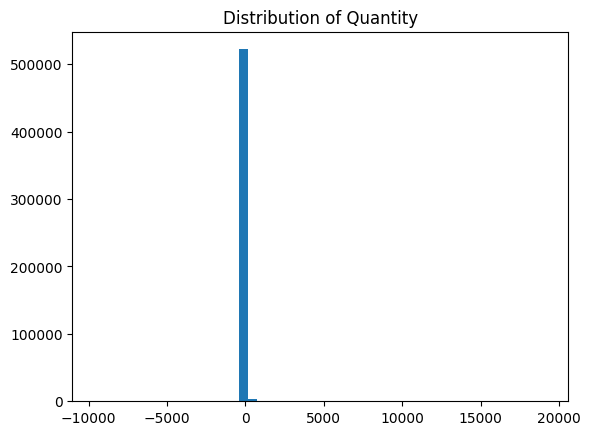

In [2]:
import matplotlib.pyplot as plt

# Check basic statistics and missing values
print(data.describe())
print(data.isnull().sum())

# Visualize the distribution of key features
plt.hist(data['Quantity'], bins=50)
plt.title('Distribution of Quantity')
plt.show()

# Handling missing values
data.dropna(subset=['Customer ID'], inplace=True)  # Remove rows where customer ID is missing


### Step 3: Feature Engineering

In [3]:
# Create a total price feature
data['TotalPrice'] = data['Quantity'] * data['Price']

# Aggregate data per customer
customer_data = data.groupby('Customer ID').agg({
    'TotalPrice': 'sum',
    'Invoice': pd.Series.nunique
}).rename(columns={'Invoice': 'NumberOfInvoices'})

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data)


### Step 4: Building the Clustering Model

In [5]:
from sklearn.cluster import KMeans

# Choose the number of clusters
kmeans = KMeans(n_clusters=3, random_state=42,n_init='auto')
kmeans.fit(scaled_features)

# Predict clusters
clusters = kmeans.predict(scaled_features)

# Add cluster information back to customer_data
customer_data['Cluster'] = clusters


### Step 5: Analyzing the Results

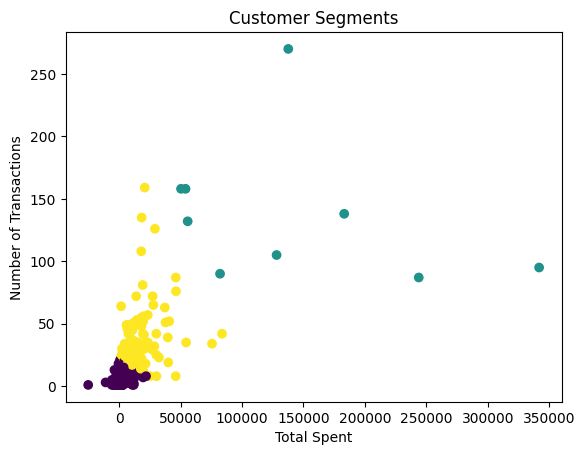

In [11]:
# Visualize clusters
plt.scatter(customer_data['TotalPrice'], customer_data['NumberOfInvoices'], c=customer_data['Cluster'])
plt.title('Customer Segments')
plt.xlabel('Total Spent')
plt.ylabel('Number of Transactions')
plt.show()
